# Breast Cancer Prediction

Introduction: Breast cancer is a significant global health concern, affecting millions of individuals every year. Early detection and accurate prediction of breast cancer play a crucial role in improving patient outcomes and survival rates.

Objective: In this project, we aim to leverage machine learning and data analysis techniques to develop a predictive model for breast cancer.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

#### Reading Data

In [2]:
data=pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Exploratory Data Analysis

In [3]:
data.shape

(569, 33)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

##### Removing unnecessary Columns

In [5]:
data=data.drop(['id','Unnamed: 32'],axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

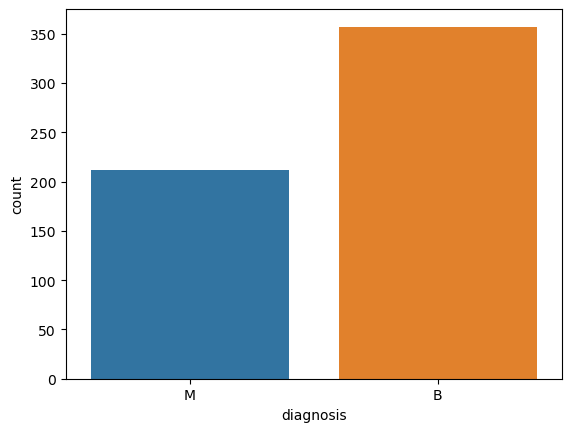

In [10]:
sns.countplot(x='diagnosis',data=data)

##### Looking for Outliers

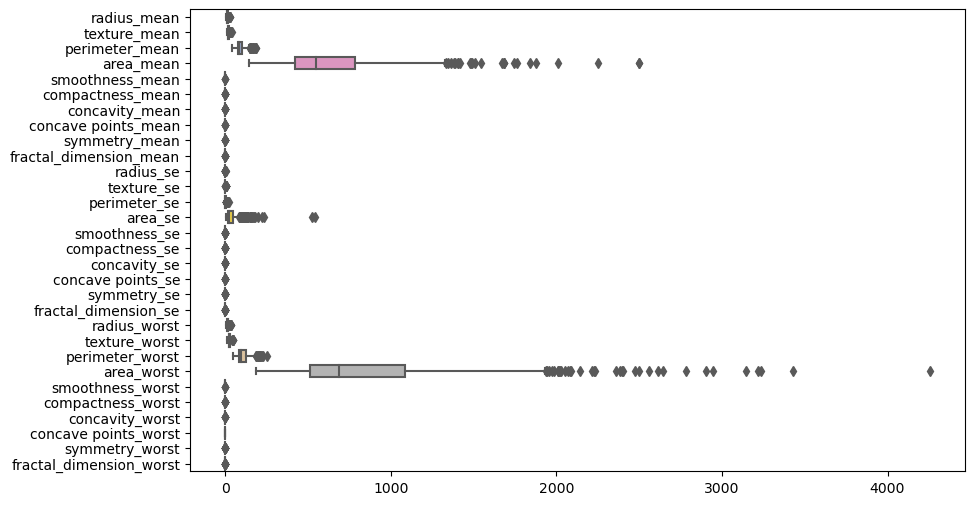

In [11]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.boxplot(data=data, orient="h", palette="Set2")

##### Removing Outliers

In [12]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

data_no_outliers = remove_outliers(data.drop('diagnosis',axis=1))
df=pd.concat([data['diagnosis'],data_no_outliers],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,NaN,NaN,0.14710,0.2419,...,25.380,17.33,184.60,NaN,0.16220,NaN,0.7119,0.2654,NaN,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,NaN,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,NaN,NaN,0.24140,0.10520,NaN,...,14.910,26.50,98.87,567.7,NaN,NaN,0.6869,0.2575,NaN,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,NaN,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,NaN,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,NaN,NaN,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,NaN,NaN,0.2650,0.4087,NaN


##### Checking again for Outliers

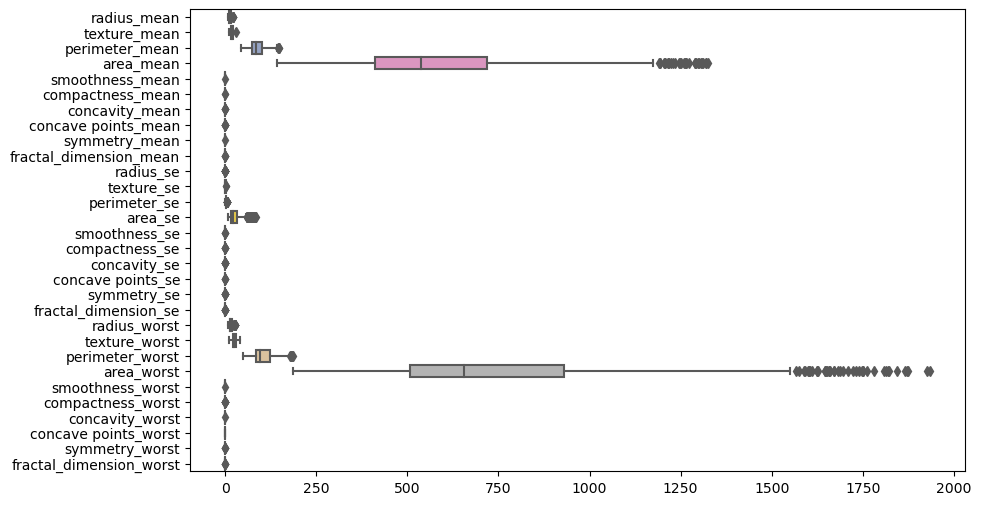

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

##### Checking for Null values after removing outliers

In [14]:
df.isnull().sum()

diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

##### Treating Null Values

In [15]:
df = df.fillna(df.mean())
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.00000,0.118400,0.099594,0.080551,0.14710,0.2419,...,25.380,17.33,184.60,778.653184,0.162200,0.238973,0.711900,0.2654,0.282075,0.118900
1,M,20.57,17.77,132.90,1326.00000,0.084740,0.078640,0.086900,0.07017,0.1812,...,24.990,23.41,158.80,778.653184,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,M,19.69,21.25,130.00,1203.00000,0.109600,0.159900,0.197400,0.12790,0.2069,...,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,M,11.42,20.38,77.58,386.10000,0.096002,0.099594,0.241400,0.10520,0.1792,...,14.910,26.50,98.87,567.700000,0.131698,0.238973,0.686900,0.2575,0.282075,0.081596
4,M,20.29,14.34,135.10,1297.00000,0.100300,0.132800,0.198000,0.10430,0.1809,...,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,608.21489,0.111000,0.115900,0.243900,0.13890,0.1726,...,25.450,26.40,166.10,778.653184,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,M,20.13,28.25,131.20,1261.00000,0.097800,0.103400,0.144000,0.09791,0.1752,...,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,M,16.60,28.08,108.30,858.10000,0.084550,0.102300,0.092510,0.05302,0.1590,...,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,M,20.60,29.33,140.10,1265.00000,0.117800,0.099594,0.080551,0.15200,0.2397,...,25.740,39.42,184.60,1821.000000,0.165000,0.238973,0.257621,0.2650,0.408700,0.081596


In [16]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Creating dummies for diagnosis column

In [17]:
df['diagnosis']=pd.get_dummies(df['diagnosis'],drop_first=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.00000,0.118400,0.099594,0.080551,0.14710,0.2419,...,25.380,17.33,184.60,778.653184,0.162200,0.238973,0.711900,0.2654,0.282075,0.118900
1,1,20.57,17.77,132.90,1326.00000,0.084740,0.078640,0.086900,0.07017,0.1812,...,24.990,23.41,158.80,778.653184,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,1,19.69,21.25,130.00,1203.00000,0.109600,0.159900,0.197400,0.12790,0.2069,...,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,1,11.42,20.38,77.58,386.10000,0.096002,0.099594,0.241400,0.10520,0.1792,...,14.910,26.50,98.87,567.700000,0.131698,0.238973,0.686900,0.2575,0.282075,0.081596
4,1,20.29,14.34,135.10,1297.00000,0.100300,0.132800,0.198000,0.10430,0.1809,...,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,608.21489,0.111000,0.115900,0.243900,0.13890,0.1726,...,25.450,26.40,166.10,778.653184,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,1,20.13,28.25,131.20,1261.00000,0.097800,0.103400,0.144000,0.09791,0.1752,...,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,1,16.60,28.08,108.30,858.10000,0.084550,0.102300,0.092510,0.05302,0.1590,...,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,1,20.60,29.33,140.10,1265.00000,0.117800,0.099594,0.080551,0.15200,0.2397,...,25.740,39.42,184.60,1821.000000,0.165000,0.238973,0.257621,0.2650,0.408700,0.081596


#### Heatmap for Correlation

<AxesSubplot:>

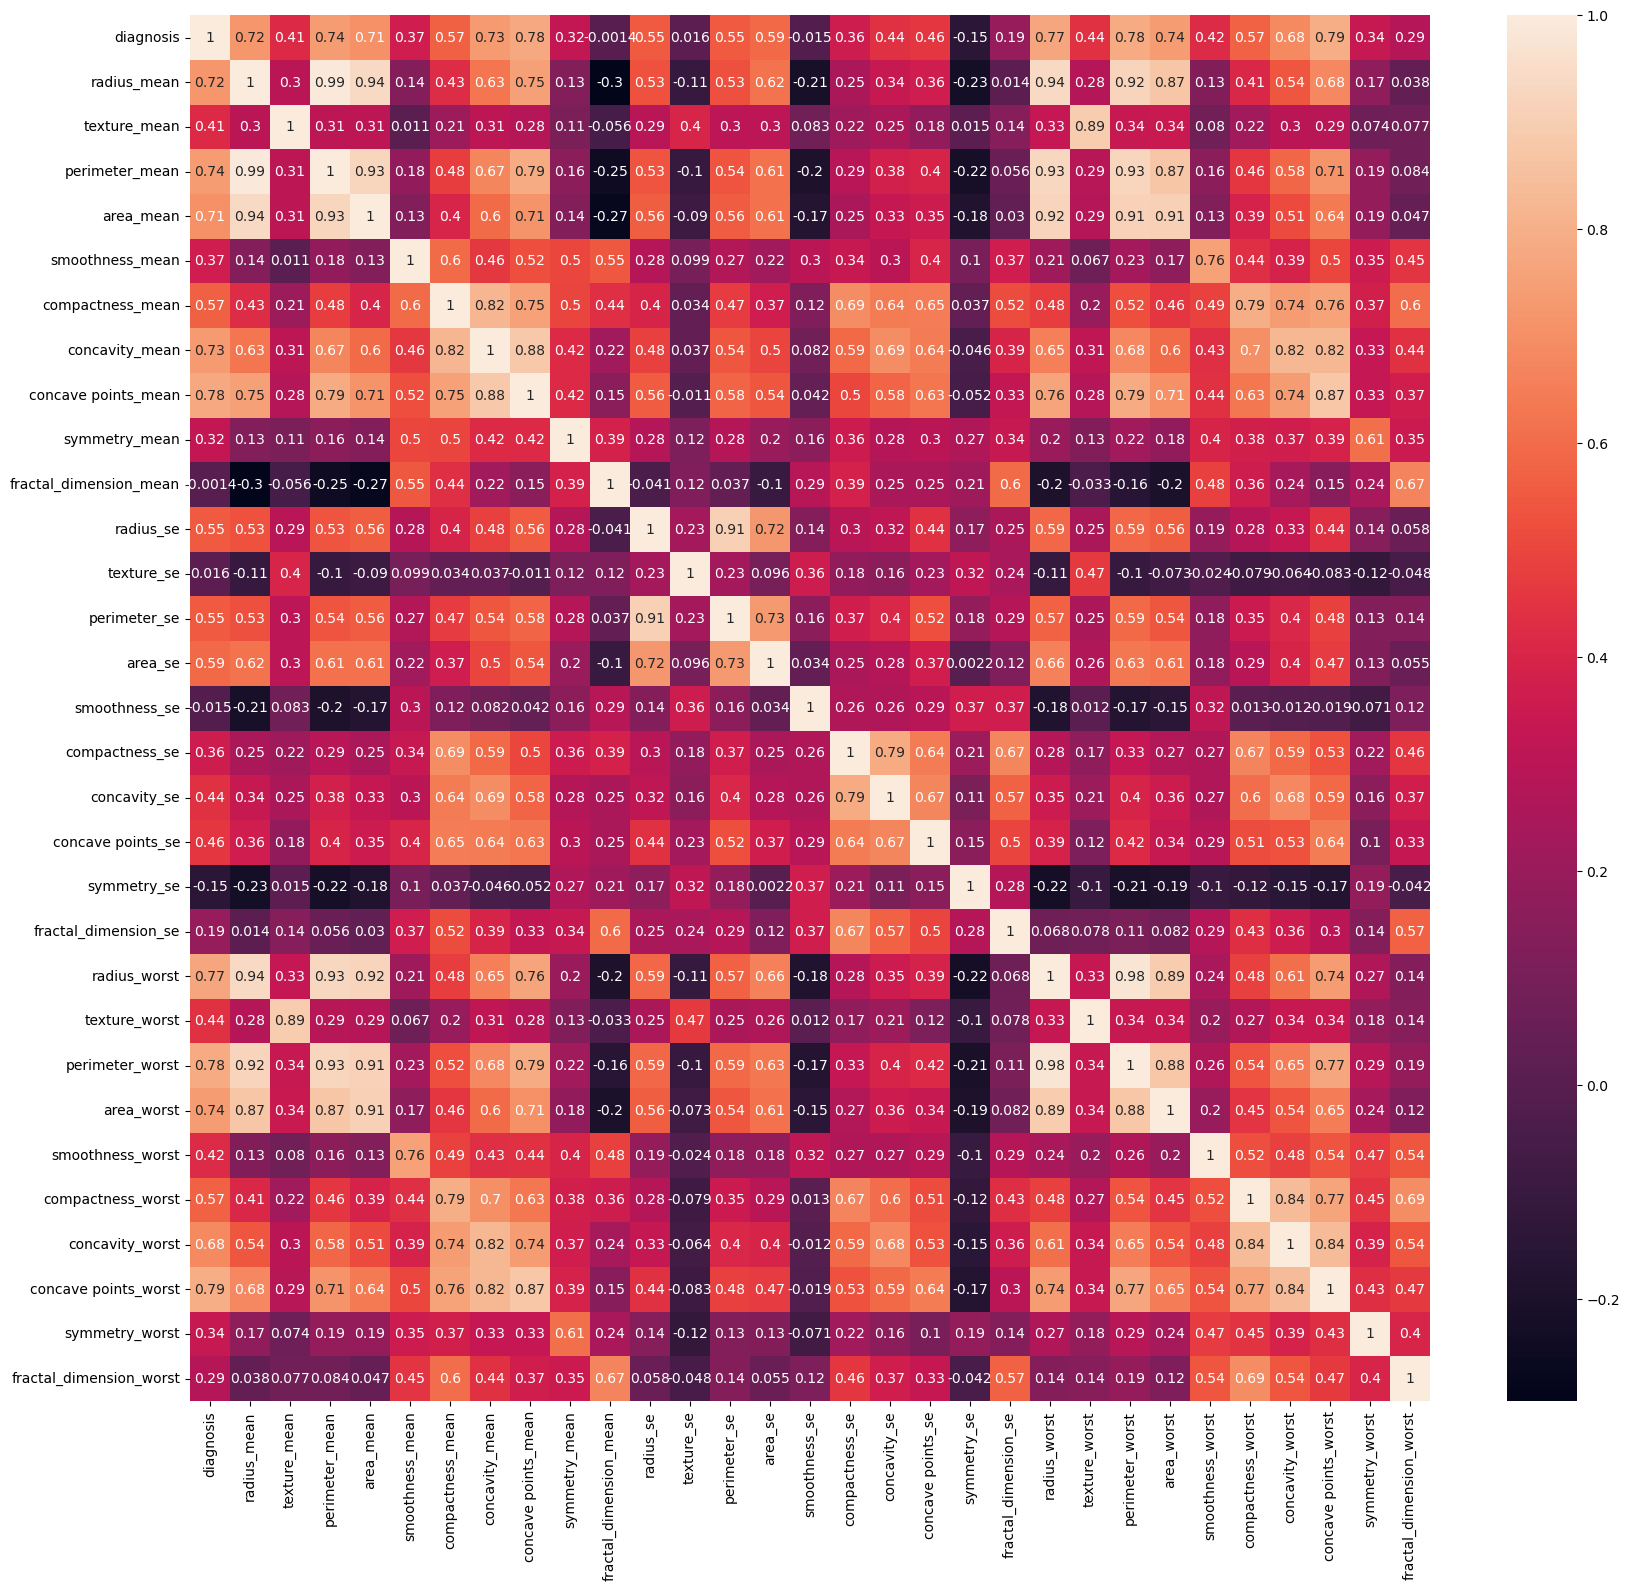

In [18]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)

#### Correlations with variable 'diagnosis'

In [19]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782657
concave points_mean        0.780237
radius_worst               0.771199
area_worst                 0.740320
perimeter_mean             0.738119
concavity_mean             0.734268
radius_mean                0.720325
area_mean                  0.706193
concavity_worst            0.682222
area_se                    0.591556
compactness_worst          0.573007
compactness_mean           0.568986
radius_se                  0.554682
perimeter_se               0.550944
concave points_se          0.456165
concavity_se               0.443118
texture_worst              0.441052
smoothness_worst           0.421112
texture_mean               0.414198
smoothness_mean            0.366746
compactness_se             0.360632
symmetry_worst             0.340678
symmetry_mean              0.324820
fractal_dimension_worst    0.285129
fractal_dimension_se       0.192004
texture_se                 0

##### Dropping least correlated variables

In [20]:
df=df.drop(['symmetry_se','smoothness_se','fractal_dimension_mean','texture_se','fractal_dimension_se','fractal_dimension_worst'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.00000,0.118400,0.099594,0.080551,0.14710,0.2419,...,0.01587,25.380,17.33,184.60,778.653184,0.162200,0.238973,0.711900,0.2654,0.282075
1,1,20.57,17.77,132.90,1326.00000,0.084740,0.078640,0.086900,0.07017,0.1812,...,0.01340,24.990,23.41,158.80,778.653184,0.123800,0.186600,0.241600,0.1860,0.275000
2,1,19.69,21.25,130.00,1203.00000,0.109600,0.159900,0.197400,0.12790,0.2069,...,0.02058,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300
3,1,11.42,20.38,77.58,386.10000,0.096002,0.099594,0.241400,0.10520,0.1792,...,0.01867,14.910,26.50,98.87,567.700000,0.131698,0.238973,0.686900,0.2575,0.282075
4,1,20.29,14.34,135.10,1297.00000,0.100300,0.132800,0.198000,0.10430,0.1809,...,0.01885,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,608.21489,0.111000,0.115900,0.243900,0.13890,0.1726,...,0.02454,25.450,26.40,166.10,778.653184,0.141000,0.211300,0.410700,0.2216,0.206000
565,1,20.13,28.25,131.20,1261.00000,0.097800,0.103400,0.144000,0.09791,0.1752,...,0.01678,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200
566,1,16.60,28.08,108.30,858.10000,0.084550,0.102300,0.092510,0.05302,0.1590,...,0.01557,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800
567,1,20.60,29.33,140.10,1265.00000,0.117800,0.099594,0.080551,0.15200,0.2397,...,0.01664,25.740,39.42,184.60,1821.000000,0.165000,0.238973,0.257621,0.2650,0.408700


In [21]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

#### Performing PCA for dimension reduction

In [22]:
scale=StandardScaler()
X=scale.fit_transform(x)

In [23]:
pca=PCA(n_components=5)
x_pca=pca.fit_transform(X)
pca_df=pd.DataFrame(data=x_pca,columns=[f'PC{i+1}' for i in range(5)])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,5.385581,1.405881,-3.512399,-0.068423,-1.205079
1,3.455913,-4.080487,-1.741215,-0.153329,0.659342
2,7.471753,-0.255254,-1.053334,-0.150391,0.486096
3,2.422523,2.011150,0.773826,1.645641,0.084796
4,5.578316,-2.160320,-2.853525,2.209549,0.763313
...,...,...,...,...,...
564,5.239194,-0.697653,-0.421576,1.603168,-1.549506
565,5.544440,-3.765911,1.774317,0.438762,1.005346
566,2.728971,-2.024775,2.565024,1.822193,-0.197592
567,8.288584,-1.437526,1.162324,-2.628098,1.838860


In [24]:
explained_variance_ratio=pca.explained_variance_ratio_*100
cumulative_explained_variance_ratio=(pca.explained_variance_ratio_*100).cumsum()
print('Explained Variance Ratio :', explained_variance_ratio)
print('Cumulative Explained Variance Ratio :', cumulative_explained_variance_ratio)

Explained Variance Ratio : [50.50626283 13.55627465  6.80894843  6.54847814  5.89204101]
Cumulative Explained Variance Ratio : [50.50626283 64.06253748 70.87148591 77.41996404 83.31200506]


<function matplotlib.pyplot.show(close=None, block=None)>

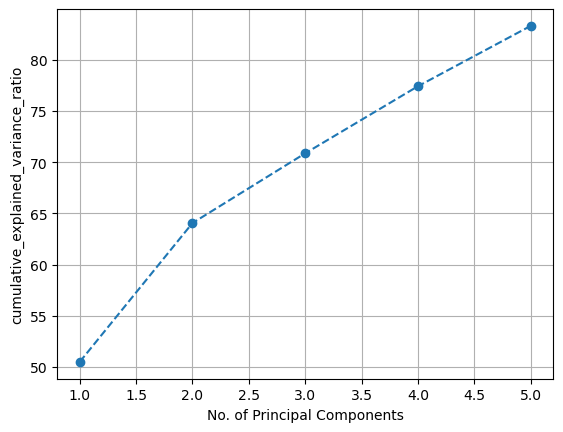

In [25]:
plt.plot(range(1,6),cumulative_explained_variance_ratio,marker='o',linestyle='--')
plt.xlabel('No. of Principal Components')
plt.ylabel('cumulative_explained_variance_ratio')
plt.grid()
plt.show

#### Train Test Split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_df,y,test_size=0.20,random_state=44)

#### Logistic Regression

In [27]:
lr=LogisticRegression(C=0.1)
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

[[75  0]
 [ 2 37]]
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Decision Tree Classification

In [28]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

[[72  3]
 [ 2 37]]
0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Random Forest Classifiction

In [29]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

[[74  1]
 [ 2 37]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### XGBoost

In [30]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

[[73  2]
 [ 2 37]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### SVC

In [31]:
svr=SVC()
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

[[74  1]
 [ 3 36]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Models Accuracy Comparison

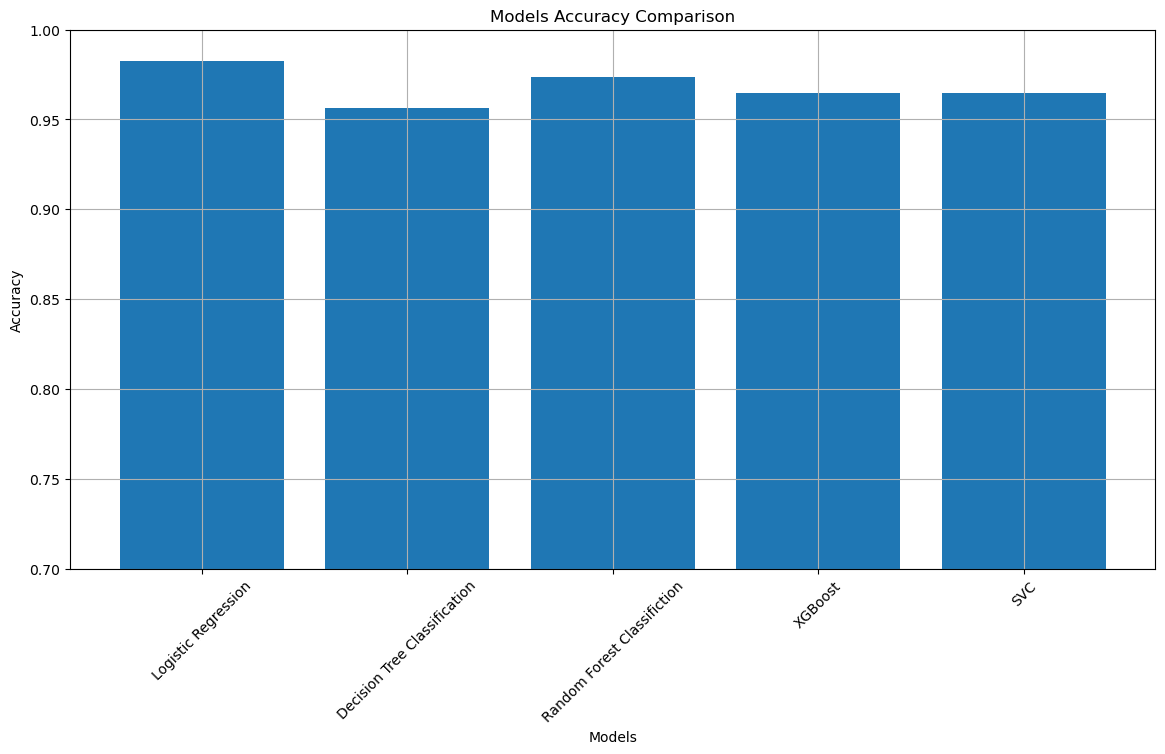

In [32]:
models = ['Logistic Regression', 'Decision Tree Classification', 'Random Forest Classifiction', 'XGBoost','SVC']
accuracies = [0.9824, 0.9561, 0.9736, 0.9649,0.9649]

plt.figure(figsize=(14, 7))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.grid()
plt.show()